In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
small_ds= "file.csv"
large_ds= "gwas.csv"

In [4]:
df = pd.read_csv(large_ds)
df.head()

,main1,main2,main3,main4,main5,main6,main7,main8,main9,main10,...,var492,var493,var494,var495,var496,var497,var498,var499,var500,classes
0,0,0,1,1,1,1,0,0,0,0,...,0,0,1,0,0,1,0,1,1,1
1,1,1,0,0,0,0,0,1,1,2,...,0,1,1,1,0,1,0,0,0,1
2,0,1,1,0,0,1,1,1,2,1,...,0,0,0,0,0,0,1,1,1,1
3,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,1
4,1,0,1,1,1,0,0,0,0,0,...,0,0,1,1,2,0,1,0,1,1


In [19]:
def plotScore(x,y, selected_features):
    df=pd.DataFrame({'features':x, 'score':y})
    plt.figure(figsize=(12,6))
    sns.barplot(df, x='features', y='score', hue='score')
    sns.barplot(x=x, y=selected_features, hue=selected_features)
    plt.xticks(rotation=45)
    plt.figure(figsize=(12,6))
    sns.scatterplot(df, x='features', y='score', hue='score')
    plt.xticks(rotation=45)
    plt.show()

<Axes: >

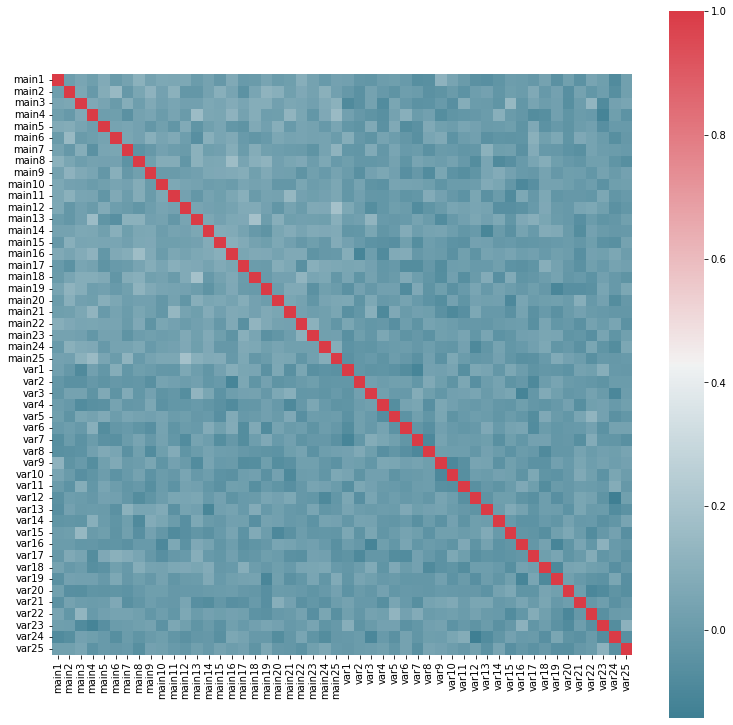

In [20]:
f, ax = plt.subplots(figsize=(13, 13))
corr = df.iloc[:, :-1].corr()
sns.heatmap(corr, mask=np.zeros_like(corr), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

<h1><b>Filter Methods for feature selection</b></h1>

In [6]:
from sklearn.model_selection import train_test_split
X = df.drop('classes', axis=1)
y = df.classes

# X = df.iloc[:, :-1].values
# y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20)
X_train

,main1,main2,main3,main4,main5,main6,main7,main8,main9,main10,...,var491,var492,var493,var494,var495,var496,var497,var498,var499,var500
476,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
515,0,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,2,0,0,0
934,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
819,0,0,1,0,0,0,0,0,0,1,...,0,2,1,0,1,1,1,1,0,0
835,1,0,1,1,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,0,0,2,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
789,0,1,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
919,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
199,0,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,1,1,1,0,0


In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi_best = SelectKBest(score_func=chi2)
k_best = chi_best.fit(X_train,y_train)

np.set_printoptions(3)
print(k_best.scores_)

k_features = k_best.transform(X_test)
print(k_features[:10])

[1.366e+01 2.036e+01 1.128e+01 1.434e+01 6.095e+00 1.329e+01 6.276e+00
 1.769e+01 8.758e+00 1.593e+01 1.441e+01 1.920e+01 8.604e+00 1.516e+01
 1.061e+01 1.689e+01 1.618e+01 1.412e+01 5.964e+00 1.306e+01 1.139e+01
 1.563e+01 8.773e+00 1.905e+01 1.882e+01 2.309e-01 7.327e-01 7.203e-02
 2.866e-01 1.538e-01 2.197e-01 2.251e-01 5.253e-03 5.126e-01 1.395e+00
 2.502e-02 1.586e-01 2.349e-02 1.023e+00 4.426e-01 5.252e-02 1.566e-02
 3.091e-01 1.462e-04 4.643e-03 1.824e+00 2.336e+00 5.501e-02 1.589e-01
 3.073e-01]
[[0 1 1 0 0 1 0 2 0 0]
 [0 0 1 2 0 2 0 1 0 1]
 [0 0 0 2 0 1 0 1 1 1]
 [0 0 0 1 0 1 0 1 0 0]
 [1 0 1 1 0 0 1 0 0 0]
 [2 0 0 1 1 1 0 1 1 0]
 [0 0 0 1 2 2 0 0 0 0]
 [1 0 0 1 0 0 0 0 1 0]
 [0 0 1 1 1 1 1 1 0 2]
 [0 1 0 1 1 0 0 0 1 0]]


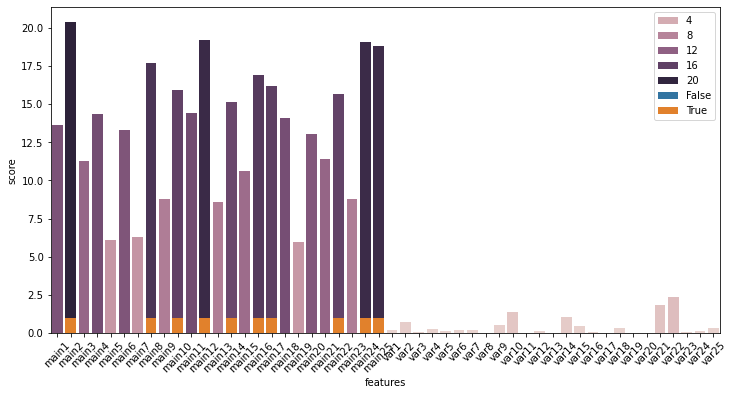

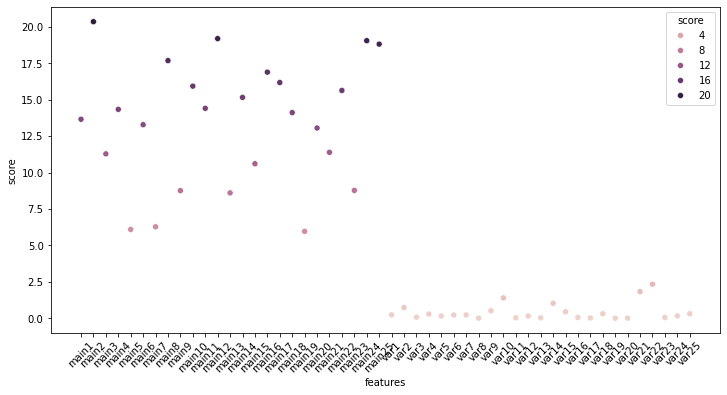

In [23]:
plotScore(k_best.feature_names_in_, k_best.scores_, k_best.get_support())

In [24]:
selected_features_mask = k_best.get_support()
selected_features = X_train.columns[selected_features_mask]
df[selected_features]

,main2,main8,main10,main12,main14,main16,main17,main22,main24,main25
0,0,1,1,0,1,0,1,0,1,0
1,1,0,0,1,0,0,0,0,0,2
2,1,1,0,0,0,1,1,1,0,0
3,2,0,1,1,0,0,0,0,0,1
4,0,0,0,0,0,2,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...
495,0,1,1,0,0,1,0,2,0,0
496,1,1,0,0,0,1,0,0,0,0
497,0,1,0,1,0,0,1,0,0,0
498,1,0,0,0,0,0,0,0,0,0


<h1><b>Wrapper Methods for feature selection</b></h1>

In [25]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [26]:
lm = LogisticRegression()
rfe = RFE(lm, n_features_to_select=10)
rfe_features = rfe.fit(X_train,y_train)
print("number of features: ",rfe_features.n_features_)
print(rfe_features.support_)
print(rfe_features.ranking_)

number of features:  10
[False  True False  True False False False False  True  True False  True
 False False False  True  True False False False False  True False  True
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False]
[ 3  1 13  1  8  6 18  9  1  1  4  1  7  5  2  1  1 15 21 11 12  1 17  1
  1 35 27 33 30 20 29 14 36 37 19 25 28 32 16 39 38 24 31 41 23 26 10 40
 34 22]


In [27]:
len(X_train.columns[selected_features_mask])

10

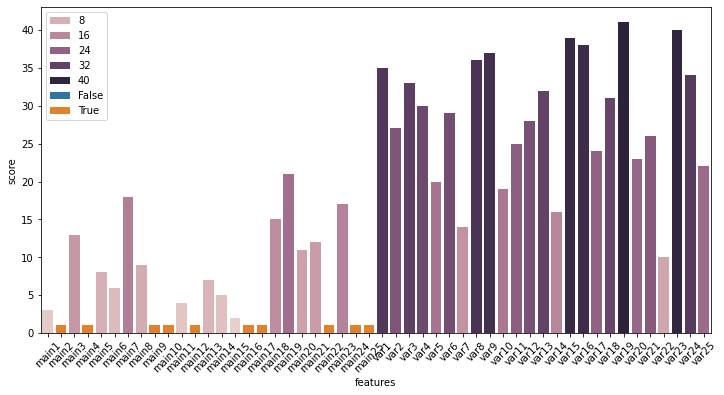

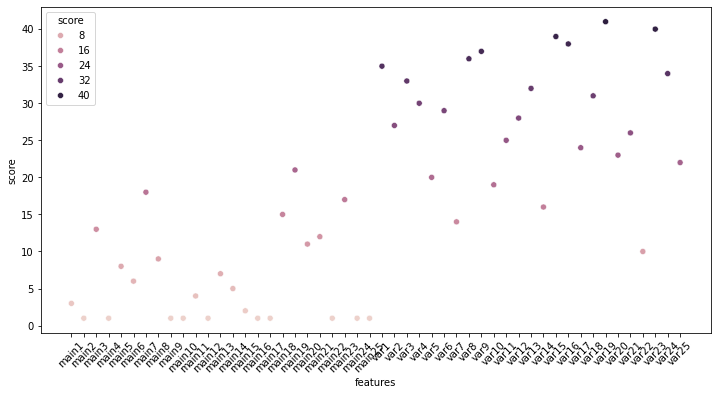

In [28]:
plotScore(rfe_features.feature_names_in_, rfe_features.ranking_, rfe_features.support_)

In [29]:
selected_features = X_train.columns[rfe_features.support_]
df[selected_features]

,main2,main4,main9,main10,main12,main16,main17,main22,main24,main25
0,0,1,0,1,0,0,1,0,1,0
1,1,1,0,0,1,0,0,0,0,2
2,1,0,0,0,0,1,1,1,0,0
3,2,0,1,1,1,0,0,0,0,1
4,0,0,0,0,0,2,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...
495,0,1,0,1,0,1,0,2,0,0
496,1,0,1,0,0,1,0,0,0,0
497,0,0,0,0,1,0,1,0,0,0
498,1,0,0,0,0,0,0,0,0,0


In [30]:
#pip install xgboost

<h1><b>Embedded Methods for feature selection</b></h1>

In [31]:
from sklearn.linear_model import Ridge

In [32]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train,y_train)

Ridge()

In [33]:
def ceofs(coef, names = None, sort=False):
    if names == None:
        names = ["X%s" % x for x in range(len(coef))]
    lst = zip(coef,names)
    if sort:
        lst = sort(lst, key= lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coefs, 3), name) for coefs,name in lst)

In [34]:
print("Ridge model:", ceofs(ridge_reg.coef_))

Ridge model: 0.097 * X0 + 0.135 * X1 + 0.06 * X2 + 0.119 * X3 + 0.072 * X4 + 0.088 * X5 + 0.066 * X6 + 0.087 * X7 + 0.096 * X8 + 0.114 * X9 + 0.104 * X10 + 0.146 * X11 + 0.062 * X12 + 0.08 * X13 + 0.1 * X14 + 0.098 * X15 + 0.127 * X16 + 0.065 * X17 + 0.054 * X18 + 0.073 * X19 + 0.073 * X20 + 0.092 * X21 + 0.07 * X22 + 0.174 * X23 + 0.091 * X24 + 0.006 * X25 + -0.021 * X26 + -0.013 * X27 + 0.006 * X28 + -0.031 * X29 + 0.03 * X30 + 0.079 * X31 + -0.003 * X32 + -0.009 * X33 + 0.041 * X34 + 0.013 * X35 + -0.013 * X36 + -0.026 * X37 + 0.048 * X38 + 0.001 * X39 + -0.002 * X40 + -0.026 * X41 + -0.04 * X42 + 0.004 * X43 + 0.015 * X44 + -0.016 * X45 + 0.06 * X46 + 0.011 * X47 + -0.005 * X48 + 0.018 * X49


In [35]:
df1 = df.rename(columns={"classes": "target"})

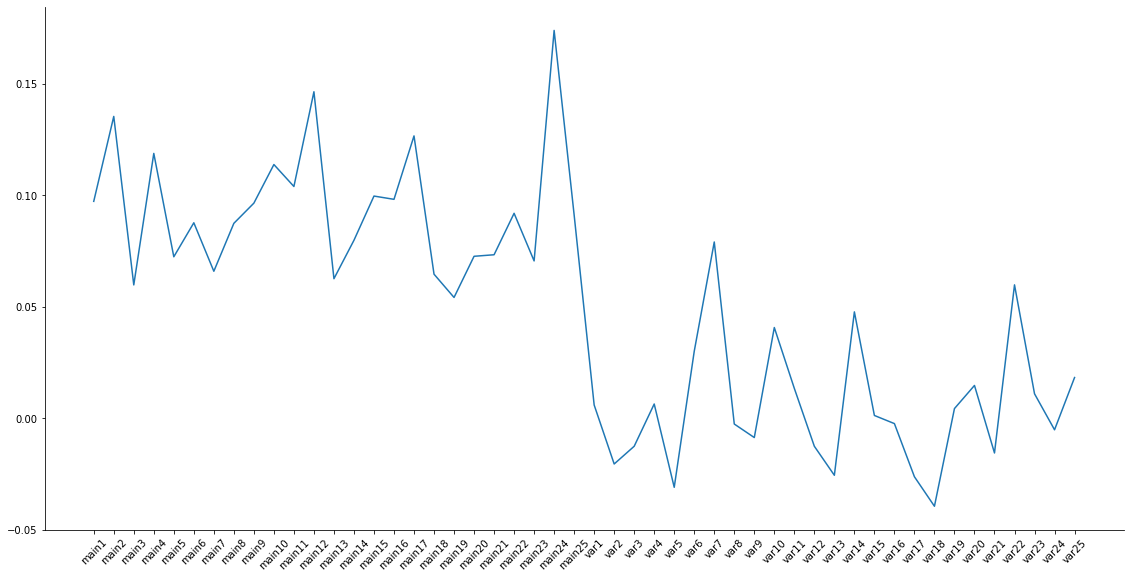

In [36]:
sns.relplot(
    kind="line",
    x=ridge_reg.feature_names_in_,y=ridge_reg.coef_, errorbar=None,height=8,aspect=2
)
plt.xticks(rotation=45)
plt.show()

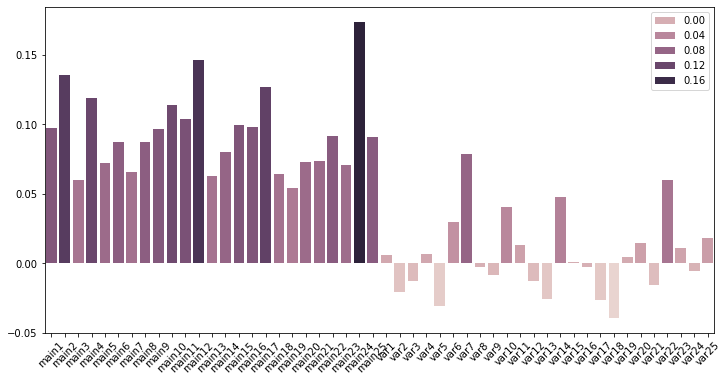

In [37]:

#plotScore(ridge_reg.feature_names_in_,ridge_reg.coef_, ridge_reg.feature_names_in_)
plt.figure(figsize=(12,6))
sns.barplot(x=ridge_reg.feature_names_in_,y=ridge_reg.coef_, hue=ridge_reg.coef_)
plt.xticks(rotation=45)
plt.show()


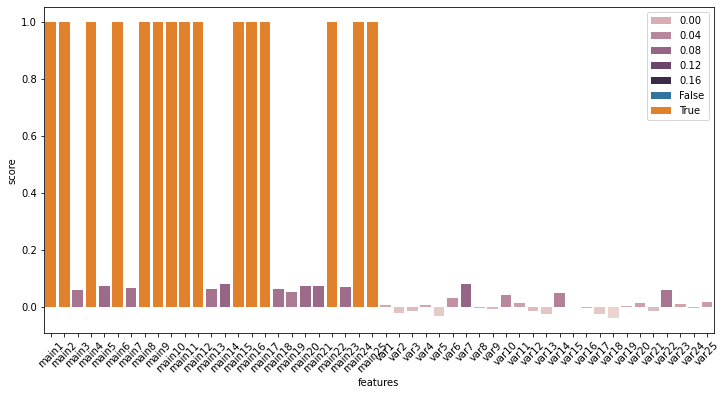

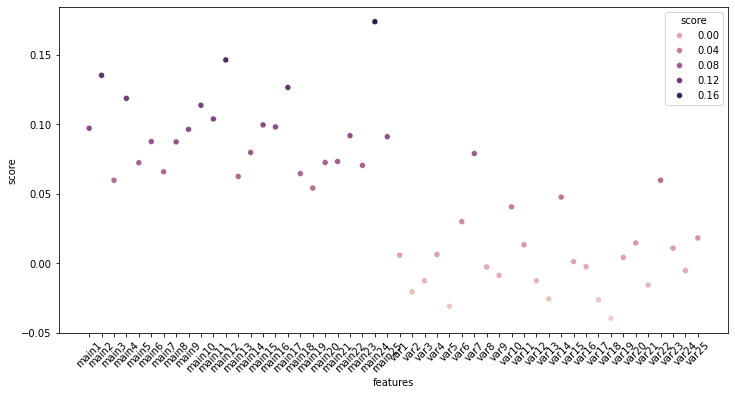

In [38]:
nr = ridge_reg.coef_[ridge_reg.coef_>0]
sel_features = np.array([True if x >= 0.08 else False for x in ridge_reg.coef_])
ridge_reg.feature_names_in_[sel_features]

plotScore(ridge_reg.feature_names_in_,ridge_reg.coef_, sel_features)


In [40]:
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

X = df.drop('classes', axis=1)
y = df.classes

# X = df.iloc[:, :-1].values
# y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20)
X_train

# Fit model on all training data
model = XGBClassifier()
model.fit(X_train, y_train)

# Make predictions for test data and evaluate
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
	# Select features using threshold
	selection = SelectFromModel(model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
    
	# Train model
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, y_train)
    
	# Evalation model
	select_X_test = selection.transform(X_test)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
	print ("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], 
                                                    accuracy*100.0))

Accuracy: 74.00%
Thresh=0.002, n=50, Accuracy: 74.00%
Thresh=0.006, n=49, Accuracy: 72.00%
Thresh=0.007, n=48, Accuracy: 74.00%
Thresh=0.007, n=47, Accuracy: 76.00%
Thresh=0.008, n=46, Accuracy: 71.00%
Thresh=0.008, n=45, Accuracy: 72.00%
Thresh=0.009, n=44, Accuracy: 67.00%
Thresh=0.010, n=43, Accuracy: 72.00%
Thresh=0.010, n=42, Accuracy: 69.00%
Thresh=0.011, n=41, Accuracy: 73.00%
Thresh=0.011, n=40, Accuracy: 73.00%
Thresh=0.012, n=39, Accuracy: 72.00%
Thresh=0.012, n=38, Accuracy: 72.00%
Thresh=0.013, n=37, Accuracy: 71.00%
Thresh=0.013, n=36, Accuracy: 73.00%
Thresh=0.013, n=35, Accuracy: 71.00%
Thresh=0.014, n=34, Accuracy: 75.00%
Thresh=0.014, n=33, Accuracy: 76.00%
Thresh=0.015, n=32, Accuracy: 75.00%
Thresh=0.015, n=31, Accuracy: 74.00%
Thresh=0.015, n=30, Accuracy: 74.00%
Thresh=0.015, n=29, Accuracy: 75.00%
Thresh=0.016, n=28, Accuracy: 76.00%
Thresh=0.017, n=27, Accuracy: 74.00%
Thresh=0.017, n=26, Accuracy: 73.00%
Thresh=0.018, n=25, Accuracy: 75.00%
Thresh=0.018, n=24, A

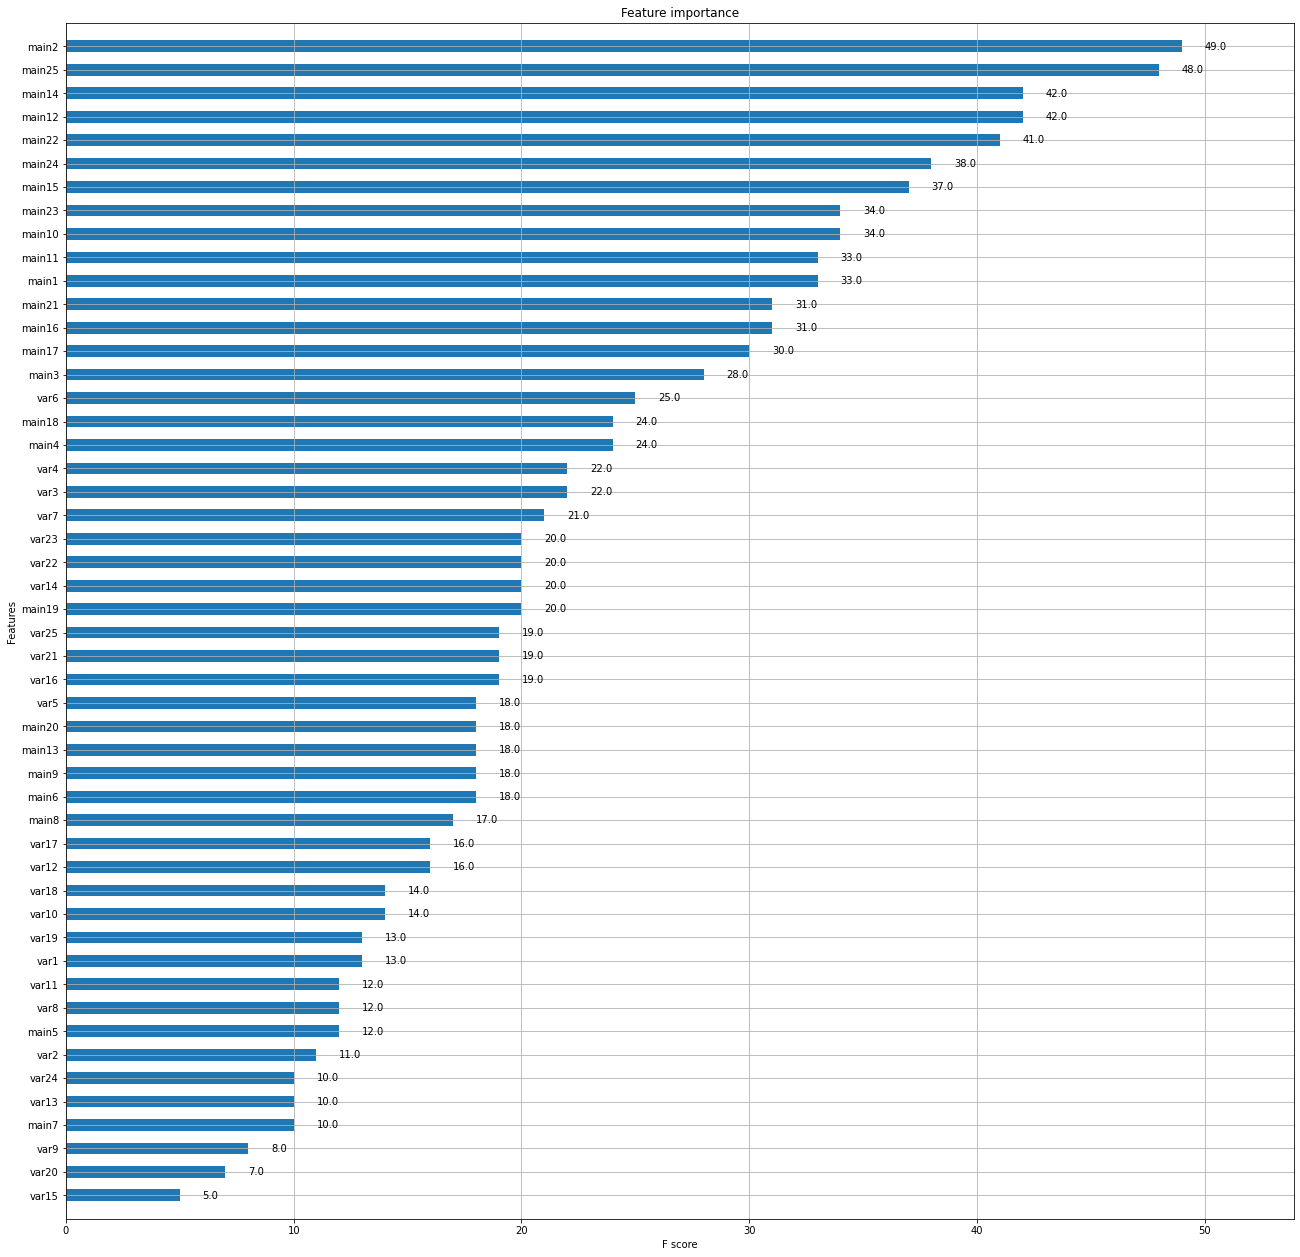

In [41]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(22, 22))

plot_importance(model, ax=ax, height=.5)

# Show the plot
plt.show()


<h1>AFS Implementation</h1>

In [19]:
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# the AFS model
class AFS:
    def __init__(self, num_features, num_classes, hidden_size=1000):
        self.num_features = num_features
        self.num_classes = num_classes
        self.hidden_size = hidden_size

        # the attention module
        self.attention_module = tf.keras.Sequential([
            tf.keras.layers.Dense(hidden_size, activation='tanh'),
            tf.keras.layers.Dense(1),
        ])

        # the learning module
        self.learning_module = tf.keras.Sequential([
            tf.keras.layers.Dense(hidden_size, activation='tanh'),
            tf.keras.layers.Dense(num_classes, activation='softmax'),
        ])

    def select_features(self, X, y):
        # Compute attention weights
        attention_scores = self.attention_module(X)
        attention_weights = tf.nn.softmax(attention_scores, axis=1)

        # Select features based on attention weights
        selected_features = X * attention_weights

        # Train the learning module
        self.learning_module.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
        history = self.learning_module.fit(selected_features, y, epochs=300,validation_data=(X,y), batch_size=10)

        # Return the selected features
        return selected_features, history


In [20]:
X = np.array(df.drop('classes', axis=1))
y = np.array(df.classes)

# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.5, random_state=2)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)


# Create an instance of the AFS model
afs = AFS(num_features=X_train.shape[1], num_classes=Y_train.shape[1])

# Select features for the training set
selected_features_train, history = afs.select_features(X_train, Y_train)

# Select features for the test set
selected_features_test, history1 = afs.select_features(X_test, Y_test)

# Convert one-hot encoded labels to integer labels
y_train_int = np.argmax(Y_train, axis=1)
y_test_int = np.argmax(Y_test, axis=1)

# Train a logistic regression model on the selected features
model = LogisticRegression()
model.fit(selected_features_train, y_train_int)

# Evaluate the performance of the model on the test set
predictions = model.predict(selected_features_test)
accuracy = accuracy_score(y_test_int, predictions)
print("Accuracy:", accuracy)


Epoch 1/100
50/50 [==============================] - 1s 4ms/step - loss: 0.2452 - acc: 0.9120 - val_loss: 0.0367 - val_acc: 1.0000
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0237 - acc: 1.0000 - val_loss: 0.0149 - val_acc: 1.0000
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0121 - acc: 1.0000 - val_loss: 0.0091 - val_acc: 1.0000
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0077 - acc: 1.0000 - val_loss: 0.0062 - val_acc: 1.0000
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0055 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 1.0000
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0041 - acc: 1.0000 - val_loss: 0.0036 - val_acc: 1.0000
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0033 - acc: 1.0000 - val_loss: 0.0029 - val_acc: 1.0000
Epoch 8/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0027 - a

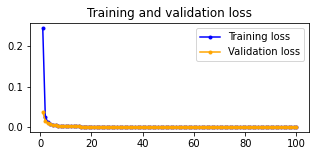

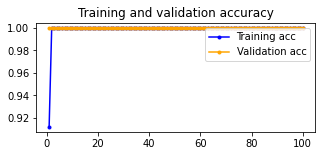

In [21]:
### Plot training and validation accuracy and loss over time
def plot_history(history):

  # Extract accuracy and loss values (in list form) from the history
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  # Create a list of epoch numbers
  epochs = range(1, len(acc) + 1)

  # Plot training and validation loss values over time
  plt.figure(figsize=(5, 2))
  plt.plot(epochs, loss, color='blue', marker='.', label='Training loss')
  plt.plot(epochs, val_loss, color='orange', marker='.', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  # Plot training and validation accuracies over time
  plt.figure(figsize=(5, 2))
  plt.plot(epochs, acc, color='blue', marker='.', label='Training acc')
  plt.plot(epochs, val_acc, color='orange', marker='.', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.show()

plot_history(history)

In [22]:

# Get weights (without the bias terms)
weights = selected_features_train

# Take RMS of each set of weights (i.e. weights feeding into nodes for each feature)
rms = np.sqrt(np.sum(np.square(weights), axis=1) / weights.shape[1])

# Normalize the RMS scores
norm_rms = rms / np.sum(rms)

# Sort features by importance ranking (RMS)
zip_features = zip(np.array(df.columns[:-1]), rms, norm_rms)
zip_features = sorted(zip_features, key = lambda x: x[1], reverse=True)

# Print feature importance
print("Feature importance (highest to lowest)")
print("Feature name\t:\tRMS value\t:\tNormalized RMS")
for name, rms, norm_rms in zip_features:
    print(name, "\t:\t", rms, "\t:\t", norm_rms)

Feature importance (highest to lowest)
Feature name	:	RMS value	:	Normalized RMS
main318 	:	 1.1246866 	:	 0.0022533874
main282 	:	 1.1210886 	:	 0.0022461785
main58 	:	 1.1143725 	:	 0.0022327222
main335 	:	 1.1128112 	:	 0.0022295942
main363 	:	 1.106382 	:	 0.0022167128
main420 	:	 1.1053588 	:	 0.0022146627
main45 	:	 1.1038332 	:	 0.0022116061
main290 	:	 1.1003332 	:	 0.0022045937
main283 	:	 1.0985795 	:	 0.00220108
main46 	:	 1.098139 	:	 0.0022001974
main421 	:	 1.0978212 	:	 0.0021995606
main397 	:	 1.0973303 	:	 0.0021985772
main191 	:	 1.094965 	:	 0.002193838
main376 	:	 1.0946993 	:	 0.0021933056
main187 	:	 1.0946761 	:	 0.0021932593
main67 	:	 1.0940397 	:	 0.002191984
main458 	:	 1.0916901 	:	 0.0021872765
main494 	:	 1.0914147 	:	 0.0021867247
main227 	:	 1.0907967 	:	 0.0021854865
main298 	:	 1.0903786 	:	 0.002184649
main166 	:	 1.090166 	:	 0.002184223
main460 	:	 1.0893364 	:	 0.0021825607
main331 	:	 1.0891894 	:	 0.0021822662
main231 	:	 1.0888331 	:	 0.00218155